<a href="https://colab.research.google.com/github/alina-bogdanovskaya/Algorithms-and-Data-Structures-Python-/blob/lesson9/Lesson9_task2_huffman_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Закодируйте любую строку по алгоритму Хаффмана.

In [ ]:
!pip install binarytree

In [1]:
from collections import Counter
from binarytree import Node

In [2]:
class MyNode:
  def __init__(self, symbol, value, left=None, right=None):
    self.symbol = symbol
    self.value = value
    self.left = left
    self.right = right

  def __str__(self):
    return f'Symbol: {self.symbol}, value: {self.value}'

  def __repr__(self):
    return f'Symbol: {self.symbol}, value: {self.value}'

In [3]:
def convert_tree(node):
  if node is None:
    return None
  bt_node = Node(f'{node.symbol}: {node.value}', convert_tree(node.left), convert_tree(node.right))
  return bt_node


In [9]:
def Huffman_coding(string):
  node_list = Counter(string).most_common()
  node_list.reverse()

  for i, item in enumerate(node_list):
    node_list[i] = MyNode(item[0], item[1])
  # print node_list

  if len(node_list) == 1:
    node_list.append(MyNode(None, 1))
    node_list[1].left = node_list[0]
    root = node_list[1]

  else:
    while len(node_list) > 1:
      first_min = node_list.pop(0)
      second_min = node_list.pop(0)
      new_node = MyNode(None, first_min.value + second_min.value, first_min, second_min)

      for i, item in enumerate(node_list):
        if new_node.value <= item.value:
          node_list.insert(i, new_node)
          break
      
      else:
        node_list.append(new_node)
        
      root = node_list[0] 

  code_dict = {}

  def coding(node, path=''):
    
    if node.left is None and node.right is None:
      code_dict[node.symbol] = path

    if node.left:
      coding(node.left, path+'0')

    if node.right:
      coding(node.right, path+'1')

    return code_dict  

  my_codes = coding(root)
  coded_str = ''
  
  for i in string:
    coded_str += my_codes[i]

  return root, coded_str

0110000111111010110001011110001110111011010011100110100001101011000101111


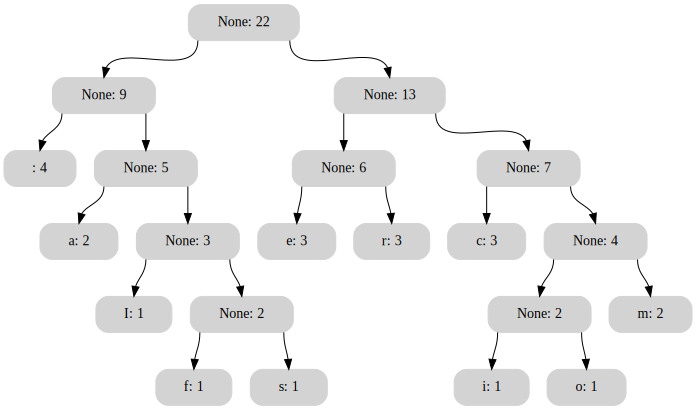

In [25]:
my_string = 'I scream for ice cream'

coded_string = Huffman_coding(my_string)[1]
root = Huffman_coding(my_string)[0]
print(coded_string)

convert_tree(root)

In [17]:
def Huffman_decoding(root, string):
  current_node = root
  decoded_string = ''

  
  for el in string:
         
    if el == '0':
      current_node = current_node.left
      
    else:
      current_node = current_node.right
      
    if current_node.left is None and current_node.right is None:
      decoded_string += current_node.symbol
      current_node = root

  return decoded_string

In [26]:
Huffman_decoding(root, coded_string)

'I scream for ice cream'